# Análise do Data Warehouse - (Cursos Superior, Faixa Etária, Brasil)

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

In [5]:
table = 'fato_aluno_etaria'
field = 'faixa_etaria'
curse_types = ['Bacharelado','Licenciatura','Tecnologia']
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes'],
    'unidade_ensino': '',
    'instituicao': 'IFPB',
}

In [6]:
s = []
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,
                ','.join(map(str,["'{}'".format(i) for i in v]))))
filter_sql = " AND ".join(map(str,s))

In [7]:
# Análise de Sexo
sql = "SELECT categoria_situacao, {0}, tipo_curso, instituicao, unidade_ensino, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY categoria_situacao, {0}, tipo_curso, instituicao " \
" ALLOW FILTERING;".format(
    field, 
    table,
    filter_sql)
rslt = session.execute(sql, timeout=None)
df = rslt._current_rows
df

,categoria_situacao,faixa_etaria,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,15 a 19 anos,Qualificação Profissional (FIC),IFPB,Campus Avançado Areia,381
1,Concluintes,15 a 19 anos,Tecnologia,IFPB,Campus Campina Grande,1
2,Concluintes,15 a 19 anos,Técnico,IFPB,Campus Avançado Cabedelo Centro,1548
3,Concluintes,20 a 24 anos,Bacharelado,IFPB,Campus Cajazeiras,81
4,Concluintes,20 a 24 anos,Especialização (Lato Sensu),IFPB,Campus Cajazeiras,3
...,...,...,...,...,...,...
123,Evadidos,Maior de 60 anos,Tecnologia,IFPB,Campus Cabedelo,6
124,Evadidos,Maior de 60 anos,Técnico,IFPB,Campus Avançado Cabedelo Centro,8
125,Evadidos,Menor de 14 anos,Qualificação Profissional (FIC),IFPB,Campus Avançado Areia,12
126,Evadidos,Menor de 14 anos,Tecnologia,IFPB,Campus Cajazeiras,2


## Filtrando Tipo do Curso

In [8]:
if curse_types :
    df = df[df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
df

Fitrando pelos tipos de cursos:
 Bacharelado, Licenciatura, Tecnologia


,categoria_situacao,faixa_etaria,tipo_curso,instituicao,unidade_ensino,quant_grupo
1,Concluintes,15 a 19 anos,Tecnologia,IFPB,Campus Campina Grande,1
3,Concluintes,20 a 24 anos,Bacharelado,IFPB,Campus Cajazeiras,81
5,Concluintes,20 a 24 anos,Licenciatura,IFPB,Campus Cajazeiras,55
8,Concluintes,20 a 24 anos,Tecnologia,IFPB,Campus Cabedelo,322
10,Concluintes,25 a 29 anos,Bacharelado,IFPB,Campus Cajazeiras,100
12,Concluintes,25 a 29 anos,Licenciatura,IFPB,Campus Cabedelo,55
15,Concluintes,25 a 29 anos,Tecnologia,IFPB,Campus Cabedelo,290
17,Concluintes,30 a 34 anos,Bacharelado,IFPB,Campus João Pessoa,29
19,Concluintes,30 a 34 anos,Licenciatura,IFPB,Campus Cajazeiras,41
22,Concluintes,30 a 34 anos,Tecnologia,IFPB,Campus Cabedelo,143


## Agrupando

In [9]:
df = df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()

<AxesSubplot:xlabel='faixa_etaria'>

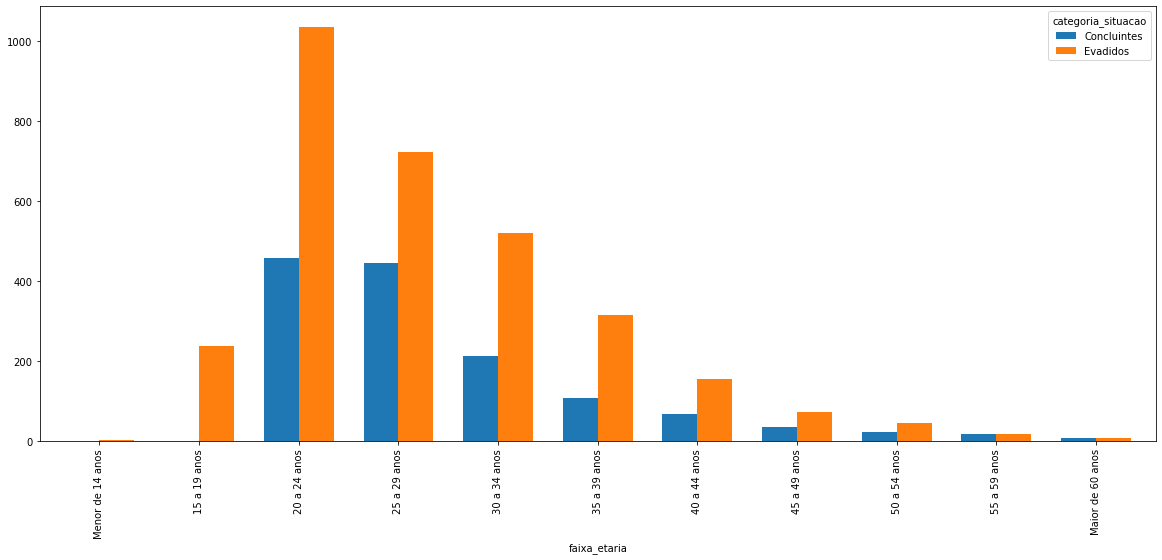

In [10]:
x = df.pivot_table('quant_grupo',[field],'categoria_situacao')
#x = df.pivot_table('quant_grupo',['categoria_situacao'],field)
order = [
    'Menor de 14 anos', '15 a 19 anos','20 a 24 anos',
    '25 a 29 anos','30 a 34 anos','35 a 39 anos',
    '40 a 44 anos','45 a 49 anos', '50 a 54 anos','55 a 59 anos',
    'Maior de 60 anos']
x.reindex(order).plot(kind ='bar', figsize=(20, 8), width = 0.7)

## Total de Alunos

In [11]:
#df[field]
df.groupby([field]).sum('quant_grupo')['quant_grupo'].reindex(order)

faixa_etaria
Menor de 14 anos       2
15 a 19 anos         239
20 a 24 anos        1494
25 a 29 anos        1169
30 a 34 anos         735
35 a 39 anos         425
40 a 44 anos         225
45 a 49 anos         108
50 a 54 anos          69
55 a 59 anos          34
Maior de 60 anos      14
Name: quant_grupo, dtype: int64

In [12]:
#df[field]
df.groupby(['categoria_situacao', field]).sum('quant_grupo')['quant_grupo']

categoria_situacao  faixa_etaria    
Concluintes         15 a 19 anos           1
                    20 a 24 anos         458
                    25 a 29 anos         445
                    30 a 34 anos         213
                    35 a 39 anos         108
                    40 a 44 anos          69
                    45 a 49 anos          35
                    50 a 54 anos          23
                    55 a 59 anos          17
                    Maior de 60 anos       7
Evadidos            15 a 19 anos         238
                    20 a 24 anos        1036
                    25 a 29 anos         724
                    30 a 34 anos         522
                    35 a 39 anos         317
                    40 a 44 anos         156
                    45 a 49 anos          73
                    50 a 54 anos          46
                    55 a 59 anos          17
                    Maior de 60 anos       7
                    Menor de 14 anos       2
Name: quant_grupo,

In [13]:
print("Total de aluns: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de aluns: 4.514
